In [1]:
import pandas as pd
import typing as t
import numpy as np

In [2]:
data = pd.read_csv("../../GrandEst.csv", index_col=0, sep=';')

/home/anna/Documents/UnivLorraine/sem9/DataMining/mine-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (1,2,3,4,11,12,13,15,18,21,24,39,40,48,49,54,55,56,70,71,77,80,83,84,89,91,92,93,95) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.columns

Index(['NUMMR', 'ACHLR', 'AEMM', 'AEMMR', 'AGED', 'AGER20', 'AGEREV',
       'AGEREVQ', 'ANAI', 'ANARR', 'ANEM', 'ANEMR', 'APAF', 'ARRIVR', 'ASCEN',
       'BAIN', 'BATI', 'CATL', 'CATPC', 'CHAU', 'CHFL', 'CHOS', 'CLIM', 'CMBL',
       'COUPLE', 'CS1', 'CS2', 'CS3', 'CUIS', 'DEPT', 'DEROU', 'DIPL_15',
       'EAU', 'EGOUL', 'ELEC', 'EMPL', 'EPCI', 'ETUD', 'GARL', 'HLML',
       'ILETUD', 'ILETUU', 'ILT', 'ILTUU', 'IMMI', 'INAI', 'INAT', 'INFAM',
       'INPER', 'INPERF', 'IPONDI', 'IRAN', 'IRANUU', 'LIENF', 'LPRF', 'LPRM',
       'METRODOM', 'MOCO', 'MODV', 'NA38', 'NA88', 'NAF08', 'NAIDT', 'NAT13',
       'NAT49', 'NATC', 'NATN12', 'NATN49', 'NATNC', 'NBPI', 'NPERR', 'NUMF',
       'ORIDT', 'PNAI12', 'PROF', 'RECH', 'SANI', 'SANIDOM', 'SEXE', 'SFM',
       'STAT', 'STAT_CONJ', 'STOCD', 'SURF', 'TACT', 'TACTD16', 'TP', 'TRANS',
       'TYPC', 'TYPFC', 'TYPL', 'TYPMD', 'TYPMR', 'UR', 'VOIT', 'WC'],
      dtype='object')

In [4]:
to_study = ["ACHLR", "AGER20", "CMBL", "CS1", "DIPL_15", "HLML", "INAT", "INPER", "MODV", "SURF", "TYPL", "UR", "IMMI", 'RECH', 'NAT13', 'DEPT']

In [5]:
our_data = data[to_study]

In [6]:
our_data.reset_index(drop=True, inplace=True)

In [7]:
our_data

,ACHLR,AGER20,CMBL,CS1,DIPL_15,HLML,INAT,INPER,MODV,SURF,TYPL,UR,IMMI,RECH,NAT13,DEPT
0,3,64,2,8,A,1,11,2,40,7,2,1,2,0,0,99
1,3,79,2,7,A,1,11,2,40,7,2,1,2,0,0,99
2,4,79,4,7,A,2,11,1,50,7,1,0,2,0,0,68
3,3,29,2,6,B,2,11,2,31,5,2,0,2,Z,0,57
4,3,29,2,4,D,2,11,2,31,5,2,0,2,Z,0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474554,Z,24,X,8,B,Z,11,Z,70,Z,Z,0,2,0,0,99
1474555,Z,64,X,8,C,Z,11,Z,70,Z,Z,0,2,0,0,99
1474556,Z,29,X,8,A,Z,11,Z,70,Z,Z,0,2,0,0,99
1474557,Z,54,X,8,B,Z,11,Z,70,Z,Z,0,2,0,0,99


In [8]:
def remove_zs(df, column_name, z='Z'):
    df = df[df[column_name] != z]
    return df

In [14]:
typl_df = our_data[['TYPL']]

In [15]:
typl_df

,TYPL
0,2
1,2
2,1
3,2
4,2
...,...
1474554,Z
1474555,Z
1474556,Z
1474557,Z


In [16]:
typl_df = remove_zs(typl_df, 'TYPL')

In [17]:
typl_df

,TYPL
0,2
1,2
2,1
3,2
4,2
...,...
1444289,1
1444290,1
1444291,1
1444292,1


# Scaling

In [9]:
def scaling_ordinal(df: pd.DataFrame, column: str, order_list: t.List=None):
    # get all the unique values for the column
    uniques = df[column].unique()

    # copy the dataframe without the column we are replacing
    df_scaled = df[[c for c in df.columns if c!= column]].copy()

    for unique in uniques:
        if order_list:
            df_scaled[f"{column}<={unique}"] = df[column].apply(order_list.index) <= order_list.index(unique)
        else:
            df_scaled[f"{column}<={unique}"] = df[column] <= unique

    return df_scaled

In [10]:
def scaling_interordinal(df: pd.DataFrame, column: str, order_list=None):
    # get all the unique values for the column
    uniques = df[column].unique()

    # copy the dataframe without the column we are replacing
    df_scaled = df[[c for c in df.columns if c!= column]].copy()

    for unique in uniques:
        if order_list:
            df_scaled[f"{column}<={unique}"] = df[column].apply(order_list.index) <= order_list.index(unique)
            df_scaled[f"{column}>={unique}"] = df[column].apply(order_list.index) >= order_list.index(unique)
        else:
            df_scaled[f"{column}<={unique}"] = df[column] <= unique
            df_scaled[f"{column}>={unique}"] = df[column] >= unique

    return df_scaled

In [11]:
def scaling_nominal(df: pd.DataFrame, column: str):
    # get all the unique values for the column
    uniques = df[column].unique()

    # copy the dataframe without the column we are replacing
    df_scaled = df[[c for c in df.columns if c!= column]].copy()

    for unique in uniques:
        df_scaled[f"{column}={unique}"] = df[column] == unique

    return df_scaled

# All Closure

In [12]:
def up(ctx: pd.DataFrame, objs: t.Iterable) -> t.List:
    objs = ctx.loc[list(objs)] # get the rows of the objects
    attrs = ctx.columns[objs.all(axis=0)]  # get the column name (attribute) when all the values in the column are True
    return attrs.to_list()

def down(ctx: pd.DataFrame, attrs: t.Iterable) -> t.List:
    attrs = ctx[list(attrs)] # get the columns of the attributes
    objs = ctx.index[attrs.all(axis=1)]  # get the row index (object) when all the values in the row are True
    return objs.to_list()

def updown(ctx: pd.DataFrame, objs: t.Iterable) -> t.Set: return set(down(ctx, up(ctx, objs)))
def downup(ctx: pd.DataFrame, attrs: t.Iterable) -> t.Set: return set(up(ctx, down(ctx, attrs)))


In [13]:
def LexicallyLower(intent: t.Set, other: t.Set, attribute_order: t.List, i: int) -> bool:
    if attribute_order[i] not in other.difference(intent):
        return False

    return intent.intersection(attribute_order[:i]) == other.intersection(attribute_order[:i])
    
def NextClosure(ctx: pd.DataFrame, intent: t.Set, attribute_order: t.List) -> t.Set:
    intent = set(intent)
    for i, a in reversed(list(enumerate(attribute_order))): # For all i in M (in reversed order) do
        intent_b = intent.intersection(set(attribute_order[:i]))
        intent_b = downup(ctx, intent_b.union({a}))

        if LexicallyLower(intent, intent_b, attribute_order, i):
            return intent_b
    #return intent # Return A

In [14]:
def AllClosureYield(ctx: pd.DataFrame, attribute_order: t.List) -> t.Generator[t.Set, None, None]:
    intent = downup(ctx, set())
    bottom = set(up(ctx, set()))
    
    while intent != bottom:
        yield intent
        intent = NextClosure(ctx, intent, attribute_order)
    yield intent
def AllClosure(ctx: pd.DataFrame, attribute_order: t.List) -> t.List[t.Set]:
    return [intent for intent in AllClosureYield(ctx, attribute_order)]

# Quesion 1

In [105]:
df = our_data[['AGER20', 'ACHLR']]

In [106]:
df = remove_zs(df, 'ACHLR')

In [107]:
df

,AGER20,ACHLR
0,64,3
1,79,3
2,79,4
3,29,3
4,29,3
...,...,...
1444289,14,5
1444290,54,5
1444291,54,5
1444292,79,4


In [108]:
df['ACHLR'] = np.array([int(x) for x in df['ACHLR']])

In [109]:
df['ACHLR']

0          3
1          3
2          4
3          3
4          3
          ..
1444289    5
1444290    5
1444291    5
1444292    4
1444293    4
Name: ACHLR, Length: 1444294, dtype: int64

In [29]:
df_scaled = scaling_nominal(scaling_interordinal(df, 'AGER20'), 'ACHLR')

In [30]:
len(df_scaled.columns)


33

In [31]:
df_scaled_head = df_scaled.head(100)

In [32]:
df_scaled_head

,AGER20<=64,AGER20>=64,AGER20<=79,AGER20>=79,AGER20<=29,AGER20>=29,AGER20<=2,AGER20>=2,AGER20<=39,AGER20>=39,...,AGER20>=10,AGER20<=19,AGER20>=19,ACHLR=3,ACHLR=4,ACHLR=6,ACHLR=7,ACHLR=5,ACHLR=1,ACHLR=2
0,True,True,True,False,False,True,False,True,False,True,...,True,False,True,True,False,False,False,False,False,False
1,False,True,True,True,False,True,False,True,False,True,...,True,False,True,True,False,False,False,False,False,False
2,False,True,True,True,False,True,False,True,False,True,...,True,False,True,False,True,False,False,False,False,False
3,True,False,True,False,True,True,False,True,True,False,...,True,False,True,True,False,False,False,False,False,False
4,True,False,True,False,True,True,False,True,True,False,...,True,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,True,False,True,False,True,False,False,True,True,False,...,True,False,True,False,False,True,False,False,False,False
96,True,False,True,False,False,True,False,True,False,True,...,True,False,True,False,False,True,False,False,False,False
97,True,False,True,False,True,False,False,True,True,False,...,True,True,False,False,False,True,False,False,False,False
98,True,False,True,False,True,False,False,True,True,False,...,True,True,False,False,False,True,False,False,False,False


In [33]:
from latviz_convert import df_to_latviz

In [34]:
df_to_latviz(df_scaled, '../latviz/q1_latviz.json')

In [35]:
attribute_order = sorted(df_scaled.columns)

In [36]:
attribute_order

['ACHLR=1',
 'ACHLR=2',
 'ACHLR=3',
 'ACHLR=4',
 'ACHLR=5',
 'ACHLR=6',
 'ACHLR=7',
 'AGER20<=10',
 'AGER20<=14',
 'AGER20<=17',
 'AGER20<=19',
 'AGER20<=2',
 'AGER20<=24',
 'AGER20<=29',
 'AGER20<=39',
 'AGER20<=5',
 'AGER20<=54',
 'AGER20<=64',
 'AGER20<=79',
 'AGER20<=80',
 'AGER20>=10',
 'AGER20>=14',
 'AGER20>=17',
 'AGER20>=19',
 'AGER20>=2',
 'AGER20>=24',
 'AGER20>=29',
 'AGER20>=39',
 'AGER20>=5',
 'AGER20>=54',
 'AGER20>=64',
 'AGER20>=79',
 'AGER20>=80']

In [32]:
attribute_order = ['ACHLR<=1',
 'ACHLR<=2',
 'ACHLR<=3',
 'ACHLR<=4',
 'ACHLR<=5',
 'ACHLR<=6',
 'ACHLR<=7',
 'AGER20<=2',
 'AGER20<=5',
 'AGER20<=10',
 'AGER20<=14',
 'AGER20<=17',
 'AGER20<=19',
 'AGER20<=24',
 'AGER20<=29',
 'AGER20<=39',
 'AGER20<=54',
 'AGER20<=64',
 'AGER20<=79',
 'AGER20<=80']

In [37]:
attribute_order

['ACHLR=1',
 'ACHLR=2',
 'ACHLR=3',
 'ACHLR=4',
 'ACHLR=5',
 'ACHLR=6',
 'ACHLR=7',
 'AGER20<=10',
 'AGER20<=14',
 'AGER20<=17',
 'AGER20<=19',
 'AGER20<=2',
 'AGER20<=24',
 'AGER20<=29',
 'AGER20<=39',
 'AGER20<=5',
 'AGER20<=54',
 'AGER20<=64',
 'AGER20<=79',
 'AGER20<=80',
 'AGER20>=10',
 'AGER20>=14',
 'AGER20>=17',
 'AGER20>=19',
 'AGER20>=2',
 'AGER20>=24',
 'AGER20>=29',
 'AGER20>=39',
 'AGER20>=5',
 'AGER20>=54',
 'AGER20>=64',
 'AGER20>=79',
 'AGER20>=80']

In [38]:
closures = AllClosure(df_scaled, attribute_order)

In [39]:
len(closures)

729

In [40]:
closures = {i:list(st) for i, st in enumerate(closures)}

In [41]:
closures

{0: ['AGER20>=2', 'AGER20<=80'],
 1: ['AGER20>=2', 'AGER20<=80', 'AGER20>=5'],
 2: ['AGER20>=2', 'AGER20<=80', 'AGER20>=5', 'AGER20>=10'],
 3: ['AGER20>=5', 'AGER20>=2', 'AGER20>=10', 'AGER20<=80', 'AGER20>=14'],
 4: ['AGER20>=5',
  'AGER20>=17',
  'AGER20>=2',
  'AGER20>=10',
  'AGER20<=80',
  'AGER20>=14'],
 5: ['AGER20>=5',
  'AGER20>=17',
  'AGER20>=19',
  'AGER20>=2',
  'AGER20>=10',
  'AGER20<=80',
  'AGER20>=14'],
 6: ['AGER20>=5',
  'AGER20>=17',
  'AGER20>=19',
  'AGER20>=2',
  'AGER20>=10',
  'AGER20<=80',
  'AGER20>=14',
  'AGER20>=24'],
 7: ['AGER20>=29',
  'AGER20>=5',
  'AGER20>=17',
  'AGER20>=19',
  'AGER20>=2',
  'AGER20>=10',
  'AGER20<=80',
  'AGER20>=14',
  'AGER20>=24'],
 8: ['AGER20>=29',
  'AGER20>=5',
  'AGER20>=17',
  'AGER20>=19',
  'AGER20>=39',
  'AGER20>=2',
  'AGER20>=10',
  'AGER20<=80',
  'AGER20>=14',
  'AGER20>=24'],
 9: ['AGER20>=29',
  'AGER20>=5',
  'AGER20>=17',
  'AGER20>=19',
  'AGER20>=39',
  'AGER20>=54',
  'AGER20>=2',
  'AGER20>=10',
  'AGER2

In [126]:
import json

with open('../closures/closures_q1.json', 'w') as f:
    json.dump(closures, f)

In [15]:
def itemset_support(df, itemset):
    num = len(down(df, itemset))
    tot = len(df)
    return num / tot

In [35]:
itemset_support(df_scaled, ['ACHLR=3'])

0.24009031402193737

In [36]:
itemset_support(df_scaled, ['AGER20<=39'])

0.4967188120978139

In [37]:
itemset_support(df_scaled, ['AGER20<=39', 'ACHLR=3'])

0.11238985968230845

In [16]:
def count_confidence(df, it1, it2):
    out_of = itemset_support(df, it1)
    if out_of == 0:
        return 0
    return itemset_support(df, it1 + it2) / out_of

In [39]:
age_house = ['ACHLR=1',
 'ACHLR=2',
 'ACHLR=3',
 'ACHLR=4',
 'ACHLR=5',
 'ACHLR=6',
 'ACHLR=7']

age_person_from = [ 'AGER20>=2',
 'AGER20>=5',
 'AGER20>=10',
 'AGER20>=14',
 'AGER20>=17',
 'AGER20>=19',
 'AGER20>=24',
 'AGER20>=29',
 'AGER20>=39',
 'AGER20>=54',
 'AGER20>=64',
 'AGER20>=79',
 'AGER20>=80'] 

age_person_until = [ 'AGER20<=2',
 'AGER20<=5',
 'AGER20<=10',
 'AGER20<=14',
 'AGER20<=17',
 'AGER20<=19',
 'AGER20<=24',
 'AGER20<=29',
 'AGER20<=39',
 'AGER20<=54',
 'AGER20<=64',
 'AGER20<=79',
 'AGER20<=80'] 

In [40]:
for h in age_house:
    for p1 in age_person_from:
        for p2 in age_person_until:
            conf_level = count_confidence(df_scaled, [h], [p1, p2])
            if conf_level > 0.8:
                print(h, p1, p2, conf_level)

ACHLR=1 AGER20>=2 AGER20<=79 0.9238583428432454
ACHLR=1 AGER20>=2 AGER20<=80 1.0
ACHLR=1 AGER20>=5 AGER20<=79 0.8981285740120604
ACHLR=1 AGER20>=5 AGER20<=80 0.974270231168815
ACHLR=1 AGER20>=10 AGER20<=79 0.8695115334967167
ACHLR=1 AGER20>=10 AGER20<=80 0.9456531906534712
ACHLR=1 AGER20>=14 AGER20<=79 0.8169544584338889
ACHLR=1 AGER20>=14 AGER20<=80 0.8930961155906434
ACHLR=1 AGER20>=17 AGER20<=80 0.848146970235534
ACHLR=1 AGER20>=19 AGER20<=80 0.8117411557817147
ACHLR=2 AGER20>=2 AGER20<=64 0.800262903002629
ACHLR=2 AGER20>=2 AGER20<=79 0.9346409298464093
ACHLR=2 AGER20>=2 AGER20<=80 1.0
ACHLR=2 AGER20>=5 AGER20<=79 0.9048775425487754
ACHLR=2 AGER20>=5 AGER20<=80 0.970236612702366
ACHLR=2 AGER20>=10 AGER20<=79 0.8731216272312162
ACHLR=2 AGER20>=10 AGER20<=80 0.938480697384807
ACHLR=2 AGER20>=14 AGER20<=79 0.8162723121627232
ACHLR=2 AGER20>=14 AGER20<=80 0.8816313823163139
ACHLR=2 AGER20>=17 AGER20<=80 0.8354642313546422
ACHLR=3 AGER20>=2 AGER20<=79 0.9204178093845616
ACHLR=3 AGER20>=

In [41]:
for h in age_house:
    for p1 in age_person_from:
        for p2 in age_person_until:
            conf_level = count_confidence(df_scaled, [p1, p2], [h])
            #if conf_level > 0.5:
            print(p1, p2, h, conf_level)

AGER20>=2 AGER20<=2 ACHLR=1 0.08308330480658867
AGER20>=2 AGER20<=5 ACHLR=1 0.08566962881409249
AGER20>=2 AGER20<=10 ACHLR=1 0.09055756583291513
AGER20>=2 AGER20<=14 ACHLR=1 0.09461034571182134
AGER20>=2 AGER20<=17 ACHLR=1 0.09751283956200137
AGER20>=2 AGER20<=19 ACHLR=1 0.09687061287427218
AGER20>=2 AGER20<=24 ACHLR=1 0.09564845760389296
AGER20>=2 AGER20<=29 ACHLR=1 0.09423690702742882
AGER20>=2 AGER20<=39 ACHLR=1 0.09426992729381328
AGER20>=2 AGER20<=54 ACHLR=1 0.10046741984246957
AGER20>=2 AGER20<=64 ACHLR=1 0.10386181560288457
AGER20>=2 AGER20<=79 ACHLR=1 0.10803347127777879
AGER20>=2 AGER20<=80 ACHLR=1 0.11102933336287488
AGER20>=5 AGER20<=2 ACHLR=1 0
AGER20>=5 AGER20<=5 ACHLR=1 0.08813643958745462
AGER20>=5 AGER20<=10 ACHLR=1 0.09321560539657989
AGER20>=5 AGER20<=14 ACHLR=1 0.09736617867235378
AGER20>=5 AGER20<=17 ACHLR=1 0.10026968903046603
AGER20>=5 AGER20<=19 ACHLR=1 0.09916864408770688
AGER20>=5 AGER20<=24 ACHLR=1 0.09723796593245077
AGER20>=5 AGER20<=29 ACHLR=1 0.09537709088

AGER20>=10 AGER20<=17 ACHLR=2 0.0967180148367667
AGER20>=10 AGER20<=19 ACHLR=2 0.09551813892955914
AGER20>=10 AGER20<=24 ACHLR=2 0.09349614984757977
AGER20>=10 AGER20<=29 ACHLR=2 0.09215850377307594
AGER20>=10 AGER20<=39 ACHLR=2 0.09220861486486487
AGER20>=10 AGER20<=54 ACHLR=2 0.09625776727388603
AGER20>=10 AGER20<=64 ACHLR=2 0.09811142535287881
AGER20>=10 AGER20<=79 ACHLR=2 0.09940240879586199
AGER20>=10 AGER20<=80 ACHLR=2 0.10103637363079357
AGER20>=14 AGER20<=2 ACHLR=2 0
AGER20>=14 AGER20<=5 ACHLR=2 0
AGER20>=14 AGER20<=10 ACHLR=2 0
AGER20>=14 AGER20<=14 ACHLR=2 0.09802135816795686
AGER20>=14 AGER20<=17 ACHLR=2 0.09882362721868893
AGER20>=14 AGER20<=19 ACHLR=2 0.09645426808083232
AGER20>=14 AGER20<=24 ACHLR=2 0.0933819372234896
AGER20>=14 AGER20<=29 ACHLR=2 0.09173662589483293
AGER20>=14 AGER20<=39 ACHLR=2 0.09194039799054352
AGER20>=14 AGER20<=54 ACHLR=2 0.09651868686559302
AGER20>=14 AGER20<=64 ACHLR=2 0.09848644576055926
AGER20>=14 AGER20<=79 ACHLR=2 0.09981556995651512
AGER20>=

AGER20>=17 AGER20<=54 ACHLR=3 0.22497320013152652
AGER20>=17 AGER20<=64 ACHLR=3 0.22610756100699061
AGER20>=17 AGER20<=79 ACHLR=3 0.23221385654382673
AGER20>=17 AGER20<=80 ACHLR=3 0.24118805774985844
AGER20>=19 AGER20<=2 ACHLR=3 0
AGER20>=19 AGER20<=5 ACHLR=3 0
AGER20>=19 AGER20<=10 ACHLR=3 0
AGER20>=19 AGER20<=14 ACHLR=3 0
AGER20>=19 AGER20<=17 ACHLR=3 0
AGER20>=19 AGER20<=19 ACHLR=3 0.21721289915303277
AGER20>=19 AGER20<=24 ACHLR=3 0.21676819155031513
AGER20>=19 AGER20<=29 ACHLR=3 0.21664327552696477
AGER20>=19 AGER20<=39 ACHLR=3 0.22008101653188433
AGER20>=19 AGER20<=54 ACHLR=3 0.2244938427715431
AGER20>=19 AGER20<=64 ACHLR=3 0.22579593672484757
AGER20>=19 AGER20<=79 ACHLR=3 0.23225569468841092
AGER20>=19 AGER20<=80 ACHLR=3 0.24164011054865409
AGER20>=24 AGER20<=2 ACHLR=3 0
AGER20>=24 AGER20<=5 ACHLR=3 0
AGER20>=24 AGER20<=10 ACHLR=3 0
AGER20>=24 AGER20<=14 ACHLR=3 0
AGER20>=24 AGER20<=17 ACHLR=3 0
AGER20>=24 AGER20<=19 ACHLR=3 0
AGER20>=24 AGER20<=24 ACHLR=3 0.2165895208505062
AGER

AGER20>=29 AGER20<=2 ACHLR=4 0
AGER20>=29 AGER20<=5 ACHLR=4 0
AGER20>=29 AGER20<=10 ACHLR=4 0
AGER20>=29 AGER20<=14 ACHLR=4 0
AGER20>=29 AGER20<=17 ACHLR=4 0
AGER20>=29 AGER20<=19 ACHLR=4 0
AGER20>=29 AGER20<=24 ACHLR=4 0
AGER20>=29 AGER20<=29 ACHLR=4 0.2382300884955752
AGER20>=29 AGER20<=39 ACHLR=4 0.22525020532463094
AGER20>=29 AGER20<=54 ACHLR=4 0.22353120794765002
AGER20>=29 AGER20<=64 ACHLR=4 0.2538618505859636
AGER20>=29 AGER20<=79 ACHLR=4 0.2762829475261304
AGER20>=29 AGER20<=80 ACHLR=4 0.2738867932059956
AGER20>=39 AGER20<=2 ACHLR=4 0
AGER20>=39 AGER20<=5 ACHLR=4 0
AGER20>=39 AGER20<=10 ACHLR=4 0
AGER20>=39 AGER20<=14 ACHLR=4 0
AGER20>=39 AGER20<=17 ACHLR=4 0
AGER20>=39 AGER20<=19 ACHLR=4 0
AGER20>=39 AGER20<=24 ACHLR=4 0
AGER20>=39 AGER20<=29 ACHLR=4 0
AGER20>=39 AGER20<=39 ACHLR=4 0.21859971750325644
AGER20>=39 AGER20<=54 ACHLR=4 0.22061604770444684
AGER20>=39 AGER20<=64 ACHLR=4 0.25608804114860456
AGER20>=39 AGER20<=79 ACHLR=4 0.28052702227390514
AGER20>=39 AGER20<=80 ACHLR=

AGER20>=54 AGER20<=80 ACHLR=5 0.13256961889484734
AGER20>=64 AGER20<=2 ACHLR=5 0
AGER20>=64 AGER20<=5 ACHLR=5 0
AGER20>=64 AGER20<=10 ACHLR=5 0
AGER20>=64 AGER20<=14 ACHLR=5 0
AGER20>=64 AGER20<=17 ACHLR=5 0
AGER20>=64 AGER20<=19 ACHLR=5 0
AGER20>=64 AGER20<=24 ACHLR=5 0
AGER20>=64 AGER20<=29 ACHLR=5 0
AGER20>=64 AGER20<=39 ACHLR=5 0
AGER20>=64 AGER20<=54 ACHLR=5 0
AGER20>=64 AGER20<=64 ACHLR=5 0.12451907966750116
AGER20>=64 AGER20<=79 ACHLR=5 0.09899810008064405
AGER20>=64 AGER20<=80 ACHLR=5 0.09041784608933072
AGER20>=79 AGER20<=2 ACHLR=5 0
AGER20>=79 AGER20<=5 ACHLR=5 0
AGER20>=79 AGER20<=10 ACHLR=5 0
AGER20>=79 AGER20<=14 ACHLR=5 0
AGER20>=79 AGER20<=17 ACHLR=5 0
AGER20>=79 AGER20<=19 ACHLR=5 0
AGER20>=79 AGER20<=24 ACHLR=5 0
AGER20>=79 AGER20<=29 ACHLR=5 0
AGER20>=79 AGER20<=39 ACHLR=5 0
AGER20>=79 AGER20<=54 ACHLR=5 0
AGER20>=79 AGER20<=64 ACHLR=5 0
AGER20>=79 AGER20<=79 ACHLR=5 0.07301545268477296
AGER20>=79 AGER20<=80 ACHLR=5 0.06566443248686239
AGER20>=80 AGER20<=2 ACHLR=5 0
A

AGER20>=2 AGER20<=14 ACHLR=7 0.03457118213394877
AGER20>=2 AGER20<=17 ACHLR=7 0.03212313059207339
AGER20>=2 AGER20<=19 ACHLR=7 0.03137729856620101
AGER20>=2 AGER20<=24 ACHLR=7 0.031300171402470184
AGER20>=2 AGER20<=29 ACHLR=7 0.034753361135026216
AGER20>=2 AGER20<=39 ACHLR=7 0.036408849636469065
AGER20>=2 AGER20<=54 ACHLR=7 0.031057562256344973
AGER20>=2 AGER20<=64 ACHLR=7 0.02794728341884709
AGER20>=2 AGER20<=79 ACHLR=7 0.025303265090332344
AGER20>=2 AGER20<=80 ACHLR=7 0.024289375985775748
AGER20>=5 AGER20<=2 ACHLR=7 0
AGER20>=5 AGER20<=5 ACHLR=7 0.041926748228244375
AGER20>=5 AGER20<=10 ACHLR=7 0.035053421557675234
AGER20>=5 AGER20<=14 ACHLR=7 0.030709461248501598
AGER20>=5 AGER20<=17 ACHLR=7 0.028569340089024314
AGER20>=5 AGER20<=19 ACHLR=7 0.02815265802307122
AGER20>=5 AGER20<=24 ACHLR=7 0.028843043204703326
AGER20>=5 AGER20<=29 ACHLR=7 0.03312076212746862
AGER20>=5 AGER20<=39 ACHLR=7 0.035344224683899736
AGER20>=5 AGER20<=54 ACHLR=7 0.030035810721037306
AGER20>=5 AGER20<=64 ACHLR=

# Question 1 but nominal + distribution

In [111]:
df_scaled = scaling_nominal(scaling_nominal(df, 'AGER20'), 'ACHLR')

In [112]:
df_scaled

,AGER20=64,AGER20=79,AGER20=29,AGER20=2,AGER20=39,AGER20=54,AGER20=5,AGER20=80,AGER20=24,AGER20=17,AGER20=14,AGER20=10,AGER20=19,ACHLR=3,ACHLR=4,ACHLR=6,ACHLR=7,ACHLR=5,ACHLR=1,ACHLR=2
0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444289,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1444290,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1444291,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1444292,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [114]:
columns

Index(['AGER20=64', 'AGER20=79', 'AGER20=29', 'AGER20=2', 'AGER20=39',
       'AGER20=54', 'AGER20=5', 'AGER20=80', 'AGER20=24', 'AGER20=17',
       'AGER20=14', 'AGER20=10', 'AGER20=19', 'ACHLR=3', 'ACHLR=4', 'ACHLR=6',
       'ACHLR=7', 'ACHLR=5', 'ACHLR=1', 'ACHLR=2'],
      dtype='object')

In [116]:
columns = list(df_scaled.columns)

In [117]:
columns

['AGER20=64',
 'AGER20=79',
 'AGER20=29',
 'AGER20=2',
 'AGER20=39',
 'AGER20=54',
 'AGER20=5',
 'AGER20=80',
 'AGER20=24',
 'AGER20=17',
 'AGER20=14',
 'AGER20=10',
 'AGER20=19',
 'ACHLR=3',
 'ACHLR=4',
 'ACHLR=6',
 'ACHLR=7',
 'ACHLR=5',
 'ACHLR=1',
 'ACHLR=2']

In [121]:
col_people = sorted(list(filter(lambda x: x[:4] == 'AGER', columns)), key=lambda x: int(x[7:]))

In [122]:
col_people

['AGER20=2',
 'AGER20=5',
 'AGER20=10',
 'AGER20=14',
 'AGER20=17',
 'AGER20=19',
 'AGER20=24',
 'AGER20=29',
 'AGER20=39',
 'AGER20=54',
 'AGER20=64',
 'AGER20=79',
 'AGER20=80']

In [123]:
col_houses = sorted(list(filter(lambda x: x[:4] == 'ACHL', columns)))

In [124]:
col_houses

['ACHLR=1', 'ACHLR=2', 'ACHLR=3', 'ACHLR=4', 'ACHLR=5', 'ACHLR=6', 'ACHLR=7']

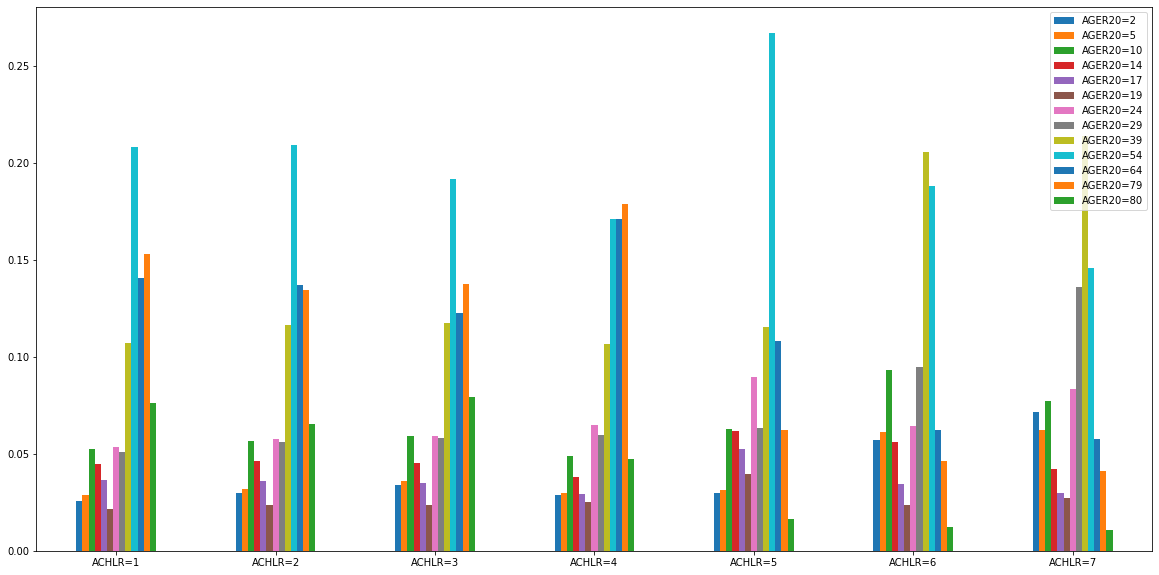

In [125]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)
dic = {}
for i in range(len(col_people)):
    y = []
    for j in range(len(col_houses)):
        y.append(count_confidence(df_scaled, [col_houses[j]], [col_people[i]]))
    dic[col_people[i]] = y
    
df = pd.DataFrame(dic, index=col_houses)
ax = df.plot.bar(rot=0)
        

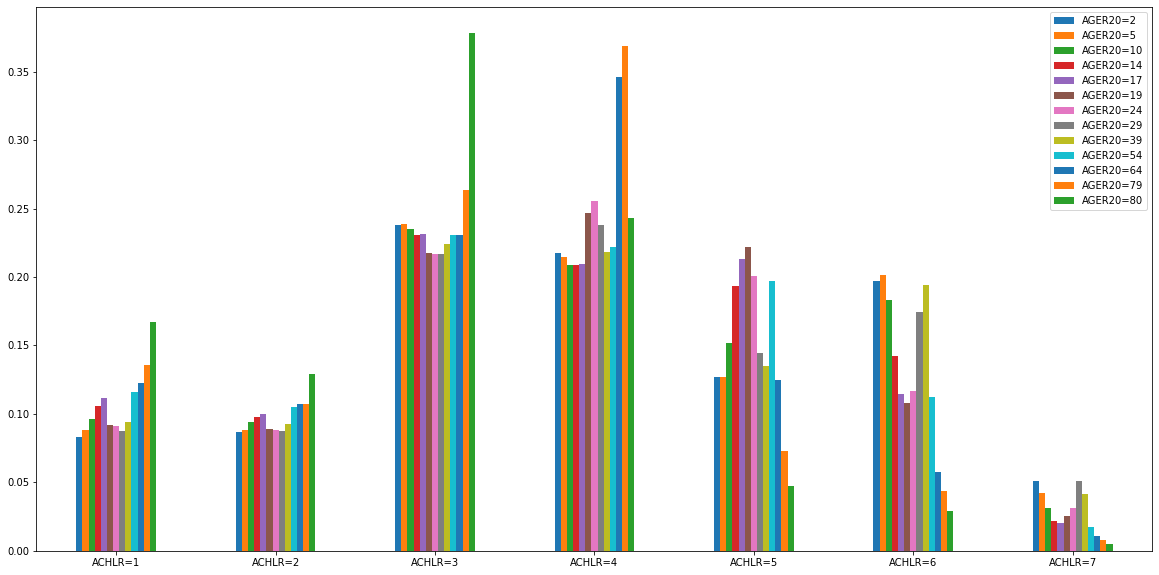

In [126]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)
dic = {}
for i in range(len(col_people)):
    y = []
    for j in range(len(col_houses)):
        y.append(count_confidence(df_scaled, [col_people[i]], [col_houses[j]]))
    dic[col_people[i]] = y
    
df = pd.DataFrame(dic, index=col_houses)
ax = df.plot.bar(rot=0)
        

# Question 2

In [42]:
df = our_data[['DIPL_15', 'CS1', 'HLML']]

In [43]:
df

,DIPL_15,CS1,HLML
0,A,8,1
1,A,7,1
2,A,7,2
3,B,6,2
4,D,4,2
...,...,...,...
1474554,B,8,Z
1474555,C,8,Z
1474556,A,8,Z
1474557,B,8,Z


In [44]:
df = remove_zs(df, 'HLML')

In [45]:
df = remove_zs(df, 'DIPL_15')

In [20]:
df = remove_zs(df, 'CS1')

In [21]:
df

,NAT13,DEPT,CS1
0,0,99,8
1,0,99,7
2,0,68,7
3,0,57,6
4,0,57,4
...,...,...,...
1474554,0,99,8
1474555,0,99,8
1474556,0,99,8
1474557,0,99,8


In [48]:
df['CS1'] = np.array([int(x) for x in df['CS1']])

In [49]:
df['HLML'] = np.array([int(x) for x in df['HLML']])

In [52]:
df_scaled = scaling_nominal(scaling_nominal(scaling_nominal(df, 'HLML'), 'CS1'), 'DIPL_15') #order_list=['D', 'C', 'B', 'A'])

In [53]:
df_scaled

,HLML=1,HLML=2,CS1=8,CS1=7,CS1=6,CS1=4,CS1=3,CS1=5,CS1=2,CS1=1,DIPL_15=A,DIPL_15=B,DIPL_15=D,DIPL_15=C
0,True,False,True,False,False,False,False,False,False,False,True,False,False,False
1,True,False,False,True,False,False,False,False,False,False,True,False,False,False
2,False,True,False,True,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,True,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444288,False,True,True,False,False,False,False,False,False,False,False,False,False,True
1444290,False,True,False,False,False,True,False,False,False,False,False,True,False,False
1444291,False,True,False,False,False,False,False,True,False,False,False,False,True,False
1444292,False,True,False,True,False,False,False,False,False,False,False,True,False,False


In [54]:
df_to_latviz(df_scaled, '../latviz/q2_latviz.json')

In [55]:
attribute_order = sorted(df_scaled.columns)

In [56]:
attribute_order

['CS1=1',
 'CS1=2',
 'CS1=3',
 'CS1=4',
 'CS1=5',
 'CS1=6',
 'CS1=7',
 'CS1=8',
 'DIPL_15=A',
 'DIPL_15=B',
 'DIPL_15=C',
 'DIPL_15=D',
 'HLML=1',
 'HLML=2']

In [57]:
closures = AllClosure(df_scaled, attribute_order)

In [58]:
len(closures)

136

In [59]:
closures = {i:list(st) for i, st in enumerate(closures)}

In [60]:
closures

{0: [],
 1: ['HLML=2'],
 2: ['HLML=1'],
 3: ['DIPL_15=D'],
 4: ['DIPL_15=D', 'HLML=2'],
 5: ['HLML=1', 'DIPL_15=D'],
 6: ['DIPL_15=C'],
 7: ['DIPL_15=C', 'HLML=2'],
 8: ['DIPL_15=C', 'HLML=1'],
 9: ['DIPL_15=B'],
 10: ['DIPL_15=B', 'HLML=2'],
 11: ['DIPL_15=B', 'HLML=1'],
 12: ['DIPL_15=A'],
 13: ['DIPL_15=A', 'HLML=2'],
 14: ['DIPL_15=A', 'HLML=1'],
 15: ['CS1=8'],
 16: ['CS1=8', 'HLML=2'],
 17: ['CS1=8', 'HLML=1'],
 18: ['CS1=8', 'DIPL_15=D'],
 19: ['CS1=8', 'DIPL_15=D', 'HLML=2'],
 20: ['CS1=8', 'HLML=1', 'DIPL_15=D'],
 21: ['DIPL_15=C', 'CS1=8'],
 22: ['DIPL_15=C', 'CS1=8', 'HLML=2'],
 23: ['DIPL_15=C', 'CS1=8', 'HLML=1'],
 24: ['DIPL_15=B', 'CS1=8'],
 25: ['DIPL_15=B', 'CS1=8', 'HLML=2'],
 26: ['DIPL_15=B', 'CS1=8', 'HLML=1'],
 27: ['DIPL_15=A', 'CS1=8'],
 28: ['DIPL_15=A', 'CS1=8', 'HLML=2'],
 29: ['DIPL_15=A', 'CS1=8', 'HLML=1'],
 30: ['CS1=7'],
 31: ['CS1=7', 'HLML=2'],
 32: ['CS1=7', 'HLML=1'],
 33: ['CS1=7', 'DIPL_15=D'],
 34: ['CS1=7', 'DIPL_15=D', 'HLML=2'],
 35: ['CS1=7', 

In [65]:
results = []
for k, closure in closures.items():
    if len(closure) >= 3:
        support = itemset_support(df_scaled, closure)
        results.append((k, closure, support))

In [66]:
results.sort(key=lambda x: -x[2])

In [67]:
for t in results:
    print(t)

(43, ['DIPL_15=A', 'CS1=7', 'HLML=2'], 0.09800485809786784)
(79, ['CS1=4', 'DIPL_15=D', 'HLML=2'], 0.07233334025370067)
(28, ['DIPL_15=A', 'CS1=8', 'HLML=2'], 0.06780077646521478)
(40, ['DIPL_15=B', 'CS1=7', 'HLML=2'], 0.06468993294164055)
(94, ['DIPL_15=D', 'CS1=3', 'HLML=2'], 0.05976706043556792)
(55, ['DIPL_15=B', 'CS1=6', 'HLML=2'], 0.05138206656009301)
(70, ['CS1=5', 'DIPL_15=B', 'HLML=2'], 0.04160192663026553)
(67, ['CS1=5', 'DIPL_15=C', 'HLML=2'], 0.03554798928727137)
(22, ['DIPL_15=C', 'CS1=8', 'HLML=2'], 0.032619843461290925)
(29, ['DIPL_15=A', 'CS1=8', 'HLML=1'], 0.031157431436460648)
(64, ['CS1=5', 'DIPL_15=D', 'HLML=2'], 0.03028214337617041)
(58, ['DIPL_15=A', 'CS1=6', 'HLML=2'], 0.029660971204351527)
(34, ['CS1=7', 'DIPL_15=D', 'HLML=2'], 0.02926734071044491)
(82, ['DIPL_15=C', 'CS1=4', 'HLML=2'], 0.024518031017086387)
(44, ['DIPL_15=A', 'CS1=7', 'HLML=1'], 0.024089521871820955)
(37, ['DIPL_15=C', 'CS1=7', 'HLML=2'], 0.022827246870263874)
(73, ['CS1=5', 'DIPL_15=A', 'HLML=

In [73]:
results = []
for k, closure in closures.items():
    if len(closure) == 2 and 'HLML=1' not in closure and 'HLML=2' not in closure:
        closure = sorted(closure)
        support = itemset_support(df_scaled, closure)
        results.append((k, closure, support, count_confidence(df_scaled, [closure[0]], [closure[1]]), count_confidence(df_scaled, [closure[1]], [closure[0]])))

In [74]:
results.sort(key=lambda x: -x[2])

In [75]:
for t in results:
    print(t)

(42, ['CS1=7', 'DIPL_15=A'], 0.12209437996968879, 0.4882570952251276, 0.3878037650646107)
(27, ['CS1=8', 'DIPL_15=A'], 0.09895820790167542, 0.5199560169125443, 0.3143172160573121)
(78, ['CS1=4', 'DIPL_15=D'], 0.078588245064048, 0.5772865081834209, 0.3113923384204327)
(39, ['CS1=7', 'DIPL_15=B'], 0.07251437706313452, 0.28998598556047794, 0.2842355392077081)
(54, ['CS1=6', 'DIPL_15=B'], 0.06610999231839226, 0.4445387536296627, 0.2591321897073663)
(93, ['CS1=3', 'DIPL_15=D'], 0.06193451948429422, 0.8381282028229793, 0.24540482912479517)
(69, ['CS1=5', 'DIPL_15=B'], 0.05426952062615484, 0.32489969622997034, 0.21272094007356532)
(57, ['CS1=6', 'DIPL_15=A'], 0.045088961322066974, 0.30318851909761, 0.14321436390349154)
(66, ['CS1=5', 'DIPL_15=C'], 0.044325783212572925, 0.26536872511049575, 0.24948817903917886)
(21, ['CS1=8', 'DIPL_15=C'], 0.04118587414619968, 0.21640289904397875, 0.2318151648577652)
(63, ['CS1=5', 'DIPL_15=D'], 0.035650133909107894, 0.2134295188899219, 0.14125749409356841)
(7

In [76]:
itemset_support(df_scaled, ['HLML=1', 'CS1=1'])

7.889218759731766e-05

In [74]:
import json

with open('../closures/closures_q2.json', 'w') as f:
    json.dump(closures, f)

# Question 3

In [77]:
df = our_data[['SURF', 'INPER']]

In [78]:
df

,SURF,INPER
0,7,2
1,7,2
2,7,1
3,5,2
4,5,2
...,...,...
1474554,Z,Z
1474555,Z,Z
1474556,Z,Z
1474557,Z,Z


In [79]:
df = remove_zs(df, 'SURF')

In [80]:
df = remove_zs(df, 'INPER')

In [81]:
df

,SURF,INPER
0,7,2
1,7,2
2,7,1
3,5,2
4,5,2
...,...,...
1444289,6,3
1444290,6,3
1444291,6,3
1444292,6,2


In [82]:
df['SURF'] = np.array([int(x) for x in df['SURF']])

In [83]:
df['INPER'] = np.array([int(x) for x in df['INPER']])

In [86]:
set(df['INPER'].values)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 38}

In [109]:
# we get rid of 15-38, as they are not really interesting (approx one household for each),describe them separately

In [107]:
df = df[df['INPER']<16]

In [108]:
df

,SURF,INPER
0,7,2
1,7,2
2,7,1
3,5,2
4,5,2
...,...,...
1444289,6,3
1444290,6,3
1444291,6,3
1444292,6,2


In [110]:
df_scaled = scaling_interordinal(scaling_nominal(df, 'SURF'), 'INPER')

In [111]:
df_scaled

,SURF=7,SURF=5,SURF=3,SURF=6,SURF=4,SURF=2,SURF=1,INPER<=2,INPER>=2,INPER<=1,...,INPER<=11,INPER>=11,INPER<=15,INPER>=15,INPER<=14,INPER>=14,INPER<=13,INPER>=13,INPER<=12,INPER>=12
0,True,False,False,False,False,False,False,True,True,False,...,True,False,True,False,True,False,True,False,True,False
1,True,False,False,False,False,False,False,True,True,False,...,True,False,True,False,True,False,True,False,True,False
2,True,False,False,False,False,False,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
3,False,True,False,False,False,False,False,True,True,False,...,True,False,True,False,True,False,True,False,True,False
4,False,True,False,False,False,False,False,True,True,False,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444289,False,False,False,True,False,False,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False
1444290,False,False,False,True,False,False,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False
1444291,False,False,False,True,False,False,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False
1444292,False,False,False,True,False,False,False,True,True,False,...,True,False,True,False,True,False,True,False,True,False


In [112]:
itemset_support(df_scaled, ['SURF=3', 'INPER>=1', 'INPER<=7'])

0.08990733194523978

In [114]:
itemset_support(df_scaled, ['SURF=1', 'INPER<=1'])

0.022392529499296144

In [117]:
count_confidence(df_scaled, ['SURF=1'], ['INPER<=1'])

0.8859757266924194

In [118]:
count_confidence(df_scaled, ['INPER<=1'], ['SURF=1'])

0.12480655158174234

In [116]:
itemset_support(df_scaled, ['SURF=1', 'INPER>=2'])

0.002881898258328042

In [119]:
attribute_order = sorted(df_scaled.columns)
closures = AllClosure(df_scaled, attribute_order)

In [120]:
#closures = AllClosure(df_scaled, attribute_order)

In [122]:
len(closures)

657

In [124]:
closures = {i:list(st) for i, st in enumerate(closures)}

In [130]:
results = []
for k, closure in closures.items():
    if 'INPER' in [cl[:5] for cl in closure] and 'SURF' in [cl[:4] for cl in closure]:
        
        support = itemset_support(df_scaled, closure)
        results.append((k, closure, support))

In [158]:
results = []
for surf in range(1, 8):
    for numl in range(1, 16):
        for numr in range(1, 16):
            if numl > numr:
                continue
            support = itemset_support(df_scaled, [f'SURF={surf}', f'INPER>={numl}', f'INPER<={numr}'])
            conf1 = count_confidence(df_scaled, [f'SURF={surf}'], [f'INPER>={numl}', f'INPER<={numr}'])
            conf2 = count_confidence(df_scaled, [f'INPER>={numl}', f'INPER<={numr}'], [f'SURF={surf}'])
            results.append((k, [f'SURF={surf}', f'INPER>={numl}', f'INPER<={numr}'], support, conf1, conf2))

In [161]:
results.sort(key=lambda x: -x[3])

ValueError: invalid literal for int() with base 10: 'INPER<=13'

In [162]:
for t in results:
    print(t)

(656, ['SURF=5', 'INPER>=1', 'INPER<=13'], 0.25231081570461444, 1.0, 0.2523335297706393)
(656, ['SURF=5', 'INPER>=1', 'INPER<=14'], 0.25231081570461444, 1.0, 0.2523212986115487)
(656, ['SURF=5', 'INPER>=1', 'INPER<=15'], 0.25231081570461444, 1.0, 0.25231081570461444)
(656, ['SURF=7', 'INPER>=1', 'INPER<=15'], 0.21582662079079787, 1.0, 0.21582662079079787)
(656, ['SURF=4', 'INPER>=1', 'INPER<=12'], 0.20343972075638403, 1.0, 0.20346902551906917)
(656, ['SURF=4', 'INPER>=1', 'INPER<=13'], 0.20343972075638403, 1.0, 0.20345803524376113)
(656, ['SURF=4', 'INPER>=1', 'INPER<=14'], 0.20343972075638403, 1.0, 0.20344817318698422)
(656, ['SURF=4', 'INPER>=1', 'INPER<=15'], 0.20343972075638403, 1.0, 0.20343972075638403)
(656, ['SURF=6', 'INPER>=1', 'INPER<=15'], 0.18722852372996018, 1.0, 0.18722852372996018)
(656, ['SURF=3', 'INPER>=1', 'INPER<=10'], 0.08998903881561045, 1.0, 0.09002669053320801)
(656, ['SURF=3', 'INPER>=1', 'INPER<=11'], 0.08998903881561045, 1.0, 0.09001022961574183)
(656, ['SURF

In [129]:
len(results)

537

(656, ['SURF=1', 'INPER>=9', 'INPER<=15'], 0.0)


(656, ['SURF=2', 'INPER>=9', 'INPER<=15'], 0.0)


(656, ['SURF=3', 'INPER>=11', 'INPER<=15'], 0.0)


(656, ['SURF=4', 'INPER>=13', 'INPER<=15'], 0.0)

(656, ['SURF=5', 'INPER>=14', 'INPER<=15'], 0.0)

In [140]:
itemset_support(df_scaled, [f'SURF=1', f'INPER>=8']) * len(df_scaled)

16.0

In [144]:
df

,SURF,INPER
0,7,2
1,7,2
2,7,1
3,5,2
4,5,2
...,...,...
1444289,6,3
1444290,6,3
1444291,6,3
1444292,6,2


In [151]:
from collections import Counter

In [156]:
our_data

,ACHLR,AGER20,CMBL,CS1,DIPL_15,HLML,INAT,INPER,MODV,SURF,TYPL,UR
0,3,64,2,8,A,1,11,2,40,7,2,1
1,3,79,2,7,A,1,11,2,40,7,2,1
2,4,79,4,7,A,2,11,1,50,7,1,0
3,3,29,2,6,B,2,11,2,31,5,2,0
4,3,29,2,4,D,2,11,2,31,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1474554,Z,24,X,8,B,Z,11,Z,70,Z,Z,0
1474555,Z,64,X,8,C,Z,11,Z,70,Z,Z,0
1474556,Z,29,X,8,A,Z,11,Z,70,Z,Z,0
1474557,Z,54,X,8,B,Z,11,Z,70,Z,Z,0


In [153]:
our_data[(our_data['SURF']==1) & (our_data['INPER'] == 8)]['CS1'] #VERY SAD

46426     8
46427     8
46428     8
46429     8
46430     8
46431     8
46432     8
46433     8
969705    8
969706    8
969707    8
969708    8
969709    8
969710    8
969711    8
969712    8
Name: CS1, dtype: int64

In [ ]:
AGER20

In [157]:
our_data[(our_data['SURF']==1) & (our_data['INPER'] == 8)]['AGER20'] #VERY SAD

46426     24
46427      5
46428      2
46429      2
46430     54
46431     24
46432     19
46433     24
969705    39
969706    39
969707    14
969708    14
969709    10
969710    10
969711     5
969712     2
Name: AGER20, dtype: int64

In [152]:
Counter(our_data[(our_data['SURF']==1) & (our_data['INPER'] == 6)]['CS1'])

Counter({8: 77, 6: 8, 5: 5, 4: 4, 2: 2})

In [154]:
len(our_data[(our_data['SURF']==1) & (our_data['INPER'] == 6)])

96

In [155]:
96/6

16.0

In [166]:
len(set(data['NUMMR'].values))

672741

In [167]:
len(data)

1474559

In [178]:
data[(data['SURF']==1) & (data['INPER'] == 8)][['ETUD','AGED', 'IMMI', 'NUMMR']]

,ETUD,AGED,IMMI,NUMMR
REGION,,,,
44,2,24,2,21559
44,2,5,2,21559
44,2,1,2,21559
44,2,1,2,21559
44,2,54,2,21559
44,2,25,2,21559
44,1,20,2,21559
44,2,24,2,21559
44,2,39,1,451697


# Question 3 but with grouping same households

In [44]:
df = data[['NUMMR', 'SURF', 'INPER']]

In [45]:
df

,NUMMR,SURF,INPER
REGION,,,
44,1,7,2
44,1,7,2
44,2,7,1
44,3,5,2
44,3,5,2
...,...,...,...
44,Z,Z,Z
44,Z,Z,Z
44,Z,Z,Z


In [46]:
df = remove_zs(df, 'INPER')
df = remove_zs(df, 'NUMMR')
df = remove_zs(df, 'SURF')

In [47]:
df

,NUMMR,SURF,INPER
REGION,,,
44,1,7,2
44,1,7,2
44,2,7,1
44,3,5,2
44,3,5,2
...,...,...,...
44,672738,6,3
44,672738,6,3
44,672738,6,3


In [183]:
all_households = set(df["NUMMR"].values)

In [185]:
len(all_households)

672740

In [48]:
itr = df.groupby('NUMMR')

In [61]:
nnn = len(itr)

In [59]:
print("\r", 'sdd', end="")
print("\r", 'sdd2', end="")

 sdd2

In [65]:
!pip install tqdm

  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)


In [66]:
from tqdm import tqdm

In [67]:
for name, group in tqdm(itr):
    #print("\r", i, ' out of ', nnn, end="")
    
    if len(set(group['SURF'].values)) != 1:
        print("!!!!!!!")
        print("SAAD", hh)
    if len(set(group['INPER'].values)) != 1:
        print("!!!!!!!")
        print("SAAD", hh)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 672740/672740 [00:40<00:00, 16492.08it/s]


In [68]:
to_eval_df = df.groupby('NUMMR').first()

In [69]:
to_eval_df

,SURF,INPER
NUMMR,,
1,7,2
2,7,1
3,5,2
4,3,1
5,6,3
...,...,...
672735,5,1
672736,5,1
672737,1,1


In [72]:
to_eval_df['SURF'] = np.array([int(x) for x in to_eval_df['SURF']])

In [73]:
to_eval_df['INPER'] = np.array([int(x) for x in to_eval_df['INPER']])

In [74]:
to_eval_df = to_eval_df[to_eval_df['INPER']<16]

In [75]:
df_scaled = scaling_interordinal(scaling_nominal(to_eval_df, 'SURF'), 'INPER')

In [76]:
df_scaled

,SURF=7,SURF=5,SURF=3,SURF=6,SURF=4,SURF=2,SURF=1,INPER<=2,INPER>=2,INPER<=1,...,INPER<=11,INPER>=11,INPER<=15,INPER>=15,INPER<=14,INPER>=14,INPER<=13,INPER>=13,INPER<=12,INPER>=12
NUMMR,,,,,,,,,,,,,,,,,,,,,
1,True,False,False,False,False,False,False,True,True,False,...,True,False,True,False,True,False,True,False,True,False
2,True,False,False,False,False,False,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
3,False,True,False,False,False,False,False,True,True,False,...,True,False,True,False,True,False,True,False,True,False
4,False,False,True,False,False,False,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
5,False,False,False,True,False,False,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672735,False,True,False,False,False,False,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
672736,False,True,False,False,False,False,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
672737,False,False,False,False,False,False,True,True,False,True,...,True,False,True,False,True,False,True,False,True,False


In [77]:
attribute_order = sorted(df_scaled.columns)
closures = AllClosure(df_scaled, attribute_order)

KeyboardInterrupt: 

In [79]:
results = []
for surf in range(1, 8):
    for numl in range(1, 16):
        for numr in range(1, 16):
            if numl > numr:
                continue
            support = itemset_support(df_scaled, [f'SURF={surf}', f'INPER>={numl}', f'INPER<={numr}'])
            conf1 = count_confidence(df_scaled, [f'SURF={surf}'], [f'INPER>={numl}', f'INPER<={numr}'])
            conf2 = count_confidence(df_scaled, [f'INPER>={numl}', f'INPER<={numr}'], [f'SURF={surf}'])
            results.append(([f'SURF={surf}', f'INPER>={numl}', f'INPER<={numr}'], support, conf1, conf2))

In [84]:
results.sort(key=lambda x: -x[3])

In [85]:
for t in results:
    print(*t)

['SURF=7', 'INPER>=14', 'INPER<=14'] 5.945877648702684e-06 3.592889671340417e-05 0.8
['SURF=7', 'INPER>=14', 'INPER<=15'] 1.0405285885229697e-05 6.28755692484573e-05 0.7777777777777778
['SURF=7', 'INPER>=15', 'INPER<=15'] 4.459408236527013e-06 2.694667253505313e-05 0.75
['SURF=7', 'INPER>=11', 'INPER<=11'] 2.0810571770459394e-05 0.0001257511384969146 0.5833333333333334
['SURF=7', 'INPER>=11', 'INPER<=12'] 2.8242918831337748e-05 0.00017066225938866983 0.5428571428571428
['SURF=7', 'INPER>=11', 'INPER<=15'] 4.0134674128743115e-05 0.00024252005281547818 0.5399999999999999
['SURF=7', 'INPER>=13', 'INPER<=15'] 1.1891755297405367e-05 7.185779342680834e-05 0.5333333333333333
['SURF=7', 'INPER>=10', 'INPER<=11'] 7.283700119660787e-05 0.00044012898473920107 0.5326086956521738
['SURF=7', 'INPER>=10', 'INPER<=15'] 9.21611035548916e-05 0.0005568978990577648 0.5254237288135594
['SURF=7', 'INPER>=10', 'INPER<=12'] 8.026934825748623e-05 0.00048504010563095635 0.5242718446601942
['SURF=7', 'INPER>=11'

In [86]:
df_scaled = scaling_nominal(scaling_nominal(to_eval_df, 'SURF'), 'INPER')

In [87]:
df_scaled

,SURF=7,SURF=5,SURF=3,SURF=6,SURF=4,SURF=2,SURF=1,INPER=2,INPER=1,INPER=3,...,INPER=5,INPER=8,INPER=7,INPER=9,INPER=10,INPER=11,INPER=15,INPER=14,INPER=13,INPER=12
NUMMR,,,,,,,,,,,,,,,,,,,,,
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672735,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
672736,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
672737,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [89]:
! pip install matplotlib

  Using cached matplotlib-3.5.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Using cached Pillow-9.0.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Using cached fonttools-4.29.0-py3-none-any.whl (895 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)


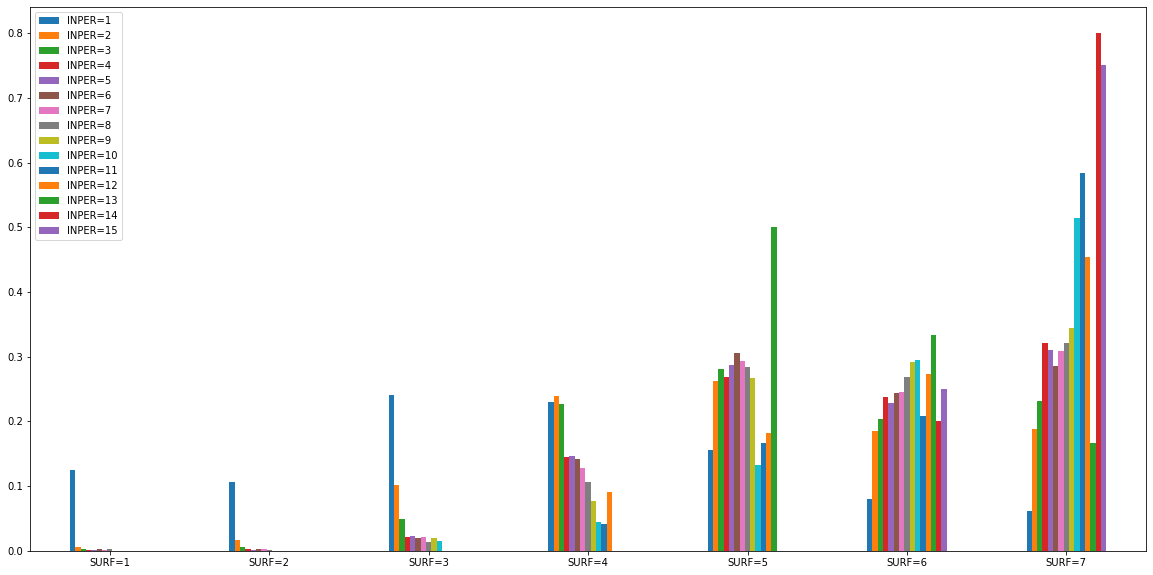

In [102]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)
dic = {}
for i in range(1,16):
    y = []
    for j in range(1, 8):
        y.append(count_confidence(df_scaled, [f'INPER={i}'], [f'SURF={j}']))
    dic[f'INPER={i}'] = y
    
df = pd.DataFrame(dic, index=[f'SURF={i}' for i in range(1, 8)])
ax = df.plot.bar(rot=0)
        

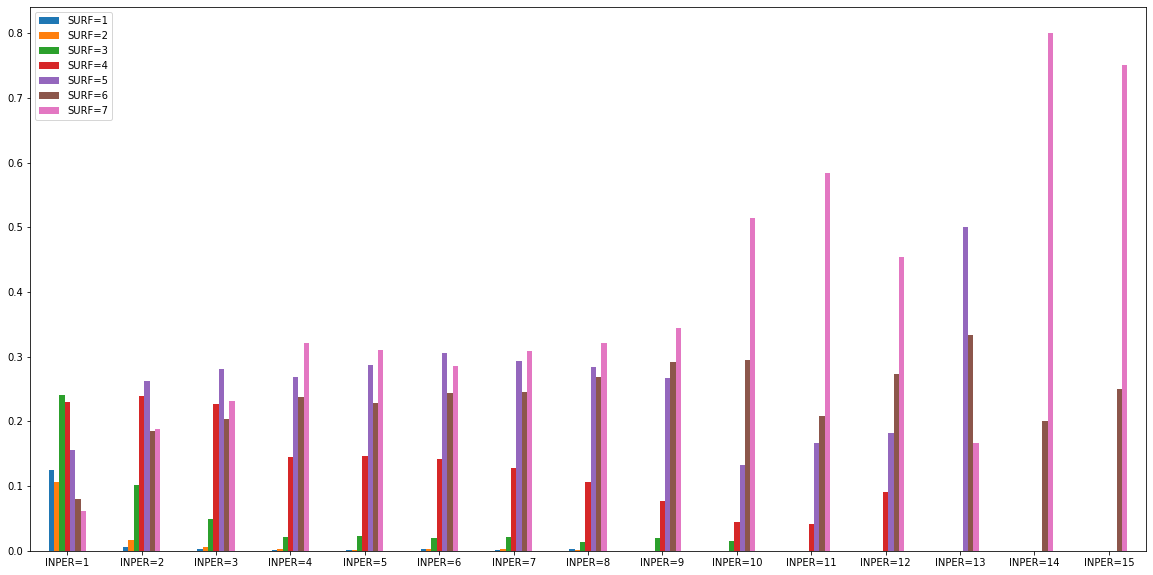

In [104]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)
dic = {}
for i in range(1,8):
    y = []
    for j in range(1, 16):
        y.append(count_confidence(df_scaled, [f'INPER={j}'], [f'SURF={i}']))
    dic[f'SURF={i}'] = y
    
df = pd.DataFrame(dic, index=[f'INPER={i}' for i in range(1, 16)])
ax = df.plot.bar(rot=0)
        

# Question 4

In [ ]:
AGER20, MODV, UR

In [219]:
df = our_data[['MODV', 'UR']]

In [221]:
df

,MODV,UR
0,40,1
1,40,1
2,50,0
3,31,0
4,31,0
...,...,...
1474554,70,0
1474555,70,0
1474556,70,0
1474557,70,0


In [222]:
#df['AGER20'] = np.array([int(x) for x in df['AGER20']])
df['MODV'] = np.array([int(x) for x in df['MODV']])
df['UR'] = np.array([int(x) for x in df['UR']])


/tmp/ipykernel_255279/604725768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MODV'] = np.array([int(x) for x in df['MODV']])
/tmp/ipykernel_255279/604725768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UR'] = np.array([int(x) for x in df['UR']])


In [226]:
df['UR']

0          1
1          1
2          0
3          0
4          0
          ..
1474554    0
1474555    0
1474556    0
1474557    0
1474558    0
Name: UR, Length: 1474559, dtype: int64

In [193]:
Counter(df['AGER20'])

Counter({64: 186201,
         79: 184180,
         29: 95492,
         2: 50061,
         39: 184435,
         54: 290955,
         5: 52435,
         80: 82039,
         24: 98444,
         17: 52873,
         14: 68695,
         10: 88252,
         19: 40497})

In [200]:
#df = remove_zs(df, 'MODV', 11)

In [201]:
#df = remove_zs(df, 'MODV', 12)

In [237]:
df = remove_zs(df, 'MODV', 70)

In [238]:
Counter(df['MODV'])

Counter({40: 278368,
         50: 177051,
         31: 66576,
         20: 82062,
         11: 302517,
         32: 330712,
         60: 44209,
         33: 64098,
         12: 98701})

In [239]:
Counter(df['UR'])

Counter({1: 1130045, 0: 314249})

In [240]:
df_scaled = scaling_nominal(scaling_nominal(df, 'MODV'), 'UR')

In [241]:
df_scaled

,MODV=40,MODV=50,MODV=31,MODV=20,MODV=11,MODV=32,MODV=60,MODV=33,MODV=12,UR=1,UR=0
0,True,False,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1444289,False,False,False,False,True,False,False,False,False,True,False
1444290,False,False,False,False,False,True,False,False,False,True,False
1444291,False,False,False,False,False,True,False,False,False,True,False
1444292,True,False,False,False,False,False,False,False,False,True,False


In [242]:
df[df['AGER20']==14]

KeyError: 'AGER20'

In [244]:
df[df['MODV']==60]

,MODV,UR
15,60,1
16,60,1
113,60,1
215,60,1
216,60,1
...,...,...
1444152,60,1
1444153,60,1
1444224,60,1
1444239,60,1


In [218]:
data[(data['INPER'] == 38)][['MODV', 'AGED','CS1', 'SURF', 'APAF', 'INPERF']] # Establishment?

,MODV,AGED,CS1,SURF,APAF,INPERF
REGION,,,,,,
44,60,18,8,7,0,Z
44,60,34,4,7,0,Z
44,60,15,8,7,0,Z
44,60,13,8,7,0,Z
44,60,3,8,7,0,Z
44,60,33,4,7,0,Z
44,60,25,4,7,0,Z
44,60,29,8,7,0,Z
44,60,6,8,7,0,Z


In [245]:
attribute_order = sorted(df_scaled.columns)
closures = AllClosure(df_scaled, attribute_order)

In [246]:
len(closures)

31

In [247]:
for c in closures:
    if len(c) == 2:
        c = sorted(list(c))
        print(c, itemset_support(df_scaled, c), count_confidence(df_scaled, [c[0]], [c[1]]), count_confidence(df_scaled, [c[1]], [c[0]]))

['MODV=60', 'UR=1'] 0.025618745213924588 0.836956275871429 0.03274294386506732
['MODV=60', 'UR=0'] 0.004990673644008768 0.16304372412857113 0.022937224939458836
['MODV=50', 'UR=1'] 0.10286409830685442 0.8391141535489773 0.1314691007880217
['MODV=50', 'UR=0'] 0.019722438783239423 0.16088584645102258 0.09064467985578316
['MODV=40', 'UR=1'] 0.13992026554150333 0.7259670651799057 0.17883004659106497
['MODV=40', 'UR=0'] 0.052816116386275924 0.2740329348200943 0.24274381143615414
['MODV=33', 'UR=1'] 0.0378108612235459 0.8519766607382445 0.0483255091611396
['MODV=33', 'UR=0'] 0.006569299602435515 0.14802333926175543 0.03019261795582484
['MODV=32', 'UR=1'] 0.16866510558099668 0.7365986114806841 0.21556840656788004
['MODV=32', 'UR=0'] 0.06031320492919032 0.2634013885193159 0.27720056388405373
['MODV=31', 'UR=1'] 0.03898929165391534 0.845830329247777 0.04983164387258915
['MODV=31', 'UR=0'] 0.007106586332145671 0.15416967075222301 0.032661997333324845
['MODV=20', 'UR=1'] 0.05352303616853632 0.942

# Q4 but retired

In [248]:
df = our_data[['CS1', 'UR']]

In [250]:
df['CS1']

0          8
1          7
2          7
3          6
4          4
          ..
1474554    8
1474555    8
1474556    8
1474557    8
1474558    8
Name: CS1, Length: 1474559, dtype: int64

In [251]:
df_scaled = scaling_nominal(scaling_nominal(df, 'CS1'), 'UR')

In [252]:
df_scaled

,CS1=8,CS1=7,CS1=6,CS1=4,CS1=3,CS1=5,CS1=2,CS1=1,UR=1,UR=0
0,True,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
1474554,True,False,False,False,False,False,False,False,False,True
1474555,True,False,False,False,False,False,False,False,False,True
1474556,True,False,False,False,False,False,False,False,False,True
1474557,True,False,False,False,False,False,False,False,False,True


In [253]:
c = ['CS1=7', 'UR=0']

In [254]:
print(itemset_support(df_scaled, c), count_confidence(df_scaled, [c[0]], [c[1]]), count_confidence(df_scaled, [c[1]], [c[0]]))

0.04967722552980247 0.234672988514953 0.2304348099633202


In [255]:
for cs in range(1, 9):
    for ur in range(0,2):
        c = [f'CS1={cs}', f'UR={ur}']
        print(c, itemset_support(df_scaled, c), count_confidence(df_scaled, [c[0]], [c[1]]), count_confidence(df_scaled, [c[1]], [c[0]]))

['CS1=1', 'UR=0'] 0.004043242759360595 0.7763020833333333 0.018755151217732142
['CS1=1', 'UR=1'] 0.0011650941061022311 0.22369791666666666 0.0014852944609237007
['CS1=2', 'UR=0'] 0.005971955004852298 0.2621379454052928 0.02770175471709984
['CS1=2', 'UR=1'] 0.016809771599508735 0.7378620545947073 0.02142956565943875
['CS1=3', 'UR=0'] 0.010277649114074106 0.16951711949530765 0.04767432349961936
['CS1=3', 'UR=1'] 0.0503513253793168 0.8304828805046924 0.06418927389158388
['CS1=4', 'UR=0'] 0.024938303587716735 0.22353048446902926 0.11567983490937002
['CS1=4', 'UR=1'] 0.08662725601349285 0.7764695155309708 0.1104348419994242
['CS1=5', 'UR=0'] 0.028542092924053904 0.2063917849331594 0.13239651950699308
['CS1=5', 'UR=1'] 0.10974874521806181 0.7936082150668406 0.13991076129554333
['CS1=6', 'UR=0'] 0.029848924322458444 0.2433864189338642 0.1384584410763607
['CS1=6', 'UR=1'] 0.09279113280648654 0.7566135810661357 0.11829272404560319
['CS1=7', 'UR=0'] 0.04967722552980247 0.234672988514953 0.230434

In [256]:
Counter(df_scaled['UR=0'].values)

Counter({False: 1156673, True: 317886})

In [257]:
317886/1156673

0.27482788999138047

# Question 5

In [ ]:
IMMI, RECH

In [24]:
df = our_data[['IMMI', 'RECH']]

In [25]:
df

,IMMI,RECH
0,2,0
1,2,0
2,2,0
3,2,Z
4,2,Z
...,...,...
1474554,2,0
1474555,2,0
1474556,2,0
1474557,2,0


In [26]:
df['IMMI']

0          2
1          2
2          2
3          2
4          2
          ..
1474554    2
1474555    2
1474556    2
1474557    2
1474558    2
Name: IMMI, Length: 1474559, dtype: int64

In [27]:
df = remove_zs(df, 'RECH', z='9')

In [30]:
from collections import Counter

In [31]:
Counter(df['RECH'])

Counter({'0': 446277, 'Z': 829588, '2': 50997, '1': 55892})

In [32]:
scaled_df = scaling_nominal(scaling_nominal(df, 'IMMI'), 'RECH')

In [33]:
scaled_df

,IMMI=2,IMMI=1,RECH=0,RECH=Z,RECH=2,RECH=1
0,True,False,True,False,False,False
1,True,False,True,False,False,False
2,True,False,True,False,False,False
3,True,False,False,True,False,False
4,True,False,False,True,False,False
...,...,...,...,...,...,...
1474554,True,False,True,False,False,False
1474555,True,False,True,False,False,False
1474556,True,False,True,False,False,False
1474557,True,False,True,False,False,False


In [34]:
#Immi -- job category

In [36]:
attribute_order = sorted(scaled_df.columns)
closures = AllClosure(scaled_df, attribute_order)

In [37]:
closures

[set(),
 {'RECH=Z'},
 {'RECH=2'},
 {'RECH=1'},
 {'RECH=0'},
 {'IMMI=2'},
 {'IMMI=2', 'RECH=Z'},
 {'IMMI=2', 'RECH=2'},
 {'IMMI=2', 'RECH=1'},
 {'IMMI=2', 'RECH=0'},
 {'IMMI=1'},
 {'IMMI=1', 'RECH=Z'},
 {'IMMI=1', 'RECH=2'},
 {'IMMI=1', 'RECH=1'},
 {'IMMI=1', 'RECH=0'},
 {'IMMI=1', 'IMMI=2', 'RECH=0', 'RECH=1', 'RECH=2', 'RECH=Z'}]

In [39]:
for c in closures:
    if len(c) == 2:
        c = sorted(list(c))
        print(c, itemset_support(scaled_df, c), count_confidence(scaled_df, [c[0]], [c[1]]), count_confidence(scaled_df, [c[1]], [c[0]]))

['IMMI=2', 'RECH=Z'] 0.5523440901273835 0.6145633677244718 0.9206449466482158
['IMMI=2', 'RECH=2'] 0.02946221815304819 0.03278101519035825 0.7988509127987921
['IMMI=2', 'RECH=1'] 0.0327411817286372 0.036429340452958814 0.8100085879911259
['IMMI=2', 'RECH=0'] 0.2842110744210467 0.31622627663221115 0.8806055431940253
['IMMI=1', 'RECH=Z'] 0.04760933615089886 0.470255443168181 0.07935505335178426
['IMMI=1', 'RECH=2'] 0.007418528530743719 0.0732756157494714 0.20114908720120792
['IMMI=1', 'RECH=1'] 0.00767960172235987 0.0758543345334019 0.18999141200887426
['IMMI=1', 'RECH=0'] 0.038533969165882004 0.3806146065489457 0.11939445680597478


In [40]:
Counter(scaled_df['IMMI=1'])

Counter({False: 1242762, True: 139992})

In [41]:
139992 / 1242762


0.11264586461446359

# Question 5

In [42]:
df = our_data[['IMMI', 'CS1']]

In [43]:
df

,IMMI,CS1
0,2,8
1,2,7
2,2,7
3,2,6
4,2,4
...,...,...
1474554,2,8
1474555,2,8
1474556,2,8
1474557,2,8


In [44]:
df['CS1']

0          8
1          7
2          7
3          6
4          4
          ..
1474554    8
1474555    8
1474556    8
1474557    8
1474558    8
Name: CS1, Length: 1474559, dtype: int64

In [45]:
scaled_df = scaling_nominal(scaling_nominal(df, 'IMMI'), 'CS1')

In [46]:
scaled_df

,IMMI=2,IMMI=1,CS1=8,CS1=7,CS1=6,CS1=4,CS1=3,CS1=5,CS1=2,CS1=1
0,True,False,True,False,False,False,False,False,False,False
1,True,False,False,True,False,False,False,False,False,False
2,True,False,False,True,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False
4,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1474554,True,False,True,False,False,False,False,False,False,False
1474555,True,False,True,False,False,False,False,False,False,False
1474556,True,False,True,False,False,False,False,False,False,False
1474557,True,False,True,False,False,False,False,False,False,False


In [47]:
attribute_order = sorted(scaled_df.columns)
closures = AllClosure(scaled_df, attribute_order)

In [48]:
closures

[set(),
 {'IMMI=2'},
 {'IMMI=1'},
 {'CS1=8'},
 {'CS1=8', 'IMMI=2'},
 {'CS1=8', 'IMMI=1'},
 {'CS1=7'},
 {'CS1=7', 'IMMI=2'},
 {'CS1=7', 'IMMI=1'},
 {'CS1=6'},
 {'CS1=6', 'IMMI=2'},
 {'CS1=6', 'IMMI=1'},
 {'CS1=5'},
 {'CS1=5', 'IMMI=2'},
 {'CS1=5', 'IMMI=1'},
 {'CS1=4'},
 {'CS1=4', 'IMMI=2'},
 {'CS1=4', 'IMMI=1'},
 {'CS1=3'},
 {'CS1=3', 'IMMI=2'},
 {'CS1=3', 'IMMI=1'},
 {'CS1=2'},
 {'CS1=2', 'IMMI=2'},
 {'CS1=2', 'IMMI=1'},
 {'CS1=1'},
 {'CS1=1', 'IMMI=2'},
 {'CS1=1', 'IMMI=1'},
 {'CS1=1',
  'CS1=2',
  'CS1=3',
  'CS1=4',
  'CS1=5',
  'CS1=6',
  'CS1=7',
  'CS1=8',
  'IMMI=1',
  'IMMI=2'}]

In [50]:
results = []
for c in closures:
    if len(c) == 2:
        c = sorted(list(c))
        results.append((c, itemset_support(scaled_df, c), count_confidence(scaled_df, [c[0]], [c[1]]), count_confidence(scaled_df, [c[1]], [c[0]])))

In [52]:
results.sort(key=lambda x: -x[3])

In [53]:
for t in results:
    print(*t)

['CS1=8', 'IMMI=2'] 0.29428730895135424 0.8994179973138337 0.3281848055027207
['CS1=8', 'IMMI=1'] 0.032910178568643235 0.10058200268616624 0.3186259060825717
['CS1=7', 'IMMI=2'] 0.19183430435811658 0.9062166621281776 0.21393074709492496
['CS1=7', 'IMMI=1'] 0.019852715286400882 0.09378333787182239 0.1922076898833911
['CS1=6', 'IMMI=1'] 0.018535033186193296 0.151133598761336 0.1794503099065028
['CS1=5', 'IMMI=1'] 0.014608435471215462 0.1056355986229759 0.14143423678957875
['CS1=5', 'IMMI=2'] 0.12368240267090025 0.8943644013770241 0.13792876563144021
['CS1=6', 'IMMI=2'] 0.1041050239427517 0.8488664012386641 0.11609636567832983
['CS1=4', 'IMMI=2'] 0.10340854452076859 0.9268859035924869 0.11531966224366708
['CS1=4', 'IMMI=1'] 0.008157015080441 0.07311409640751322 0.07897363168400041
['CS1=3', 'IMMI=2'] 0.05472280186821958 0.9025849822708918 0.061026050194553996
['CS1=3', 'IMMI=1'] 0.005906172625171322 0.09741501772910817 0.0571816892530728
['CS1=2', 'IMMI=1'] 0.0032260492798185762 0.1416068

# Question bonus: is there a portuguese cluster in Meurthe et Moselle?

In [28]:
df = our_data[['NAT13', 'DEPT']]#, 'CS1']]

In [29]:
df

,NAT13,DEPT
0,0,99
1,0,99
2,0,68
3,0,57
4,0,57
...,...,...
1474554,0,99
1474555,0,99
1474556,0,99
1474557,0,99


In [30]:
df.dtypes

NAT13    int64
DEPT     int64
dtype: object

In [31]:
scaled_df = scaling_nominal(scaling_nominal(df, 'NAT13'), 'DEPT')

In [32]:
scaled_df

,NAT13=0,NAT13=1,NAT13=3,NAT13=8,NAT13=11,NAT13=5,NAT13=10,NAT13=2,NAT13=7,NAT13=12,NAT13=6,NAT13=9,NAT13=4,DEPT=99,DEPT=68,DEPT=57,DEPT=67,DEPT=54
0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474554,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1474555,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1474556,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1474557,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [33]:
attribute_order = sorted(scaled_df.columns)
closures = AllClosure(scaled_df, attribute_order)

In [34]:
closures

[set(),
 {'NAT13=9'},
 {'NAT13=8'},
 {'NAT13=7'},
 {'NAT13=6'},
 {'NAT13=5'},
 {'NAT13=4'},
 {'NAT13=3'},
 {'NAT13=2'},
 {'NAT13=12'},
 {'NAT13=11'},
 {'NAT13=10'},
 {'NAT13=1'},
 {'NAT13=0'},
 {'DEPT=99'},
 {'DEPT=99', 'NAT13=9'},
 {'DEPT=99', 'NAT13=8'},
 {'DEPT=99', 'NAT13=7'},
 {'DEPT=99', 'NAT13=6'},
 {'DEPT=99', 'NAT13=5'},
 {'DEPT=99', 'NAT13=4'},
 {'DEPT=99', 'NAT13=3'},
 {'DEPT=99', 'NAT13=2'},
 {'DEPT=99', 'NAT13=12'},
 {'DEPT=99', 'NAT13=11'},
 {'DEPT=99', 'NAT13=10'},
 {'DEPT=99', 'NAT13=1'},
 {'DEPT=99', 'NAT13=0'},
 {'DEPT=68'},
 {'DEPT=68', 'NAT13=9'},
 {'DEPT=68', 'NAT13=8'},
 {'DEPT=68', 'NAT13=7'},
 {'DEPT=68', 'NAT13=6'},
 {'DEPT=68', 'NAT13=5'},
 {'DEPT=68', 'NAT13=4'},
 {'DEPT=68', 'NAT13=3'},
 {'DEPT=68', 'NAT13=2'},
 {'DEPT=68', 'NAT13=12'},
 {'DEPT=68', 'NAT13=11'},
 {'DEPT=68', 'NAT13=10'},
 {'DEPT=68', 'NAT13=1'},
 {'DEPT=68', 'NAT13=0'},
 {'DEPT=67'},
 {'DEPT=67', 'NAT13=9'},
 {'DEPT=67', 'NAT13=8'},
 {'DEPT=67', 'NAT13=7'},
 {'DEPT=67', 'NAT13=6'},
 {'DEPT=6

In [39]:
results = []
for c in closures:
    if len(c) == 2:
        c = sorted(list(c))
        results.append((c, itemset_support(scaled_df, c), count_confidence(scaled_df, [c[0]], [c[1]]), count_confidence(scaled_df, [c[1]], [c[0]])))

In [42]:
results.sort(key=lambda x: -x[2])

In [43]:
for t in results:
    print(*t)

['DEPT=99', 'NAT13=0'] 0.30213711353699646 0.9194262034579682 0.34445117081343446
['DEPT=54', 'NAT13=0'] 0.11267300935398313 0.8873927766442696 0.12845277277165834
['DEPT=57', 'NAT13=0'] 0.16488523009252257 0.8622318525007003 0.18797727260427224
['DEPT=67', 'NAT13=0'] 0.17967880566325253 0.8463516543894507 0.2048426764144897
['DEPT=68', 'NAT13=0'] 0.11778097722776776 0.8360048906346272 0.13427610739614526
['DEPT=68', 'NAT13=1'] 0.008725320587375615 0.06193199322242761 0.1768498027518522
['DEPT=57', 'NAT13=1'] 0.011502422080093099 0.0601494426929474 0.23313768882901953
['DEPT=67', 'NAT13=1'] 0.012630216898747354 0.059492854085342085 0.2559964811480254
['DEPT=54', 'NAT13=1'] 0.005842424752078418 0.046013908324698496 0.11841761625269756
['DEPT=99', 'NAT13=1'] 0.010637078611300057 0.032369438792146314 0.21559841101840524
['DEPT=67', 'NAT13=5'] 0.004214819481621284 0.019853312292762083 0.3281588257035746
['DEPT=57', 'NAT13=5'] 0.0035210527350889318 0.01841258808217575 0.27414330218068533
['

In [38]:
df_scaled = scaling_nominal(scaling_nominal(scaling_nominal(df, 'NAT13'), 'DEPT'), 'CS1')

KeyError: 'CS1'

In [24]:
scaled_df.columns

Index(['NAT13=0', 'NAT13=1', 'NAT13=3', 'NAT13=8', 'NAT13=11', 'NAT13=5',
       'NAT13=10', 'NAT13=2', 'NAT13=7', 'NAT13=12', 'NAT13=6', 'NAT13=9',
       'NAT13=4', 'DEPT=99', 'DEPT=68', 'DEPT=57', 'DEPT=67', 'DEPT=54',
       'CS1=8', 'CS1=7', 'CS1=6', 'CS1=4', 'CS1=3', 'CS1=5', 'CS1=2', 'CS1=1'],
      dtype='object')

In [28]:
results = []
for nat in range(0, 13):
    for dept in [99, 68, 57, 67, 54]:
        for cs in range(1, 9):
            support = itemset_support(df_scaled, [f'NAT13={nat}', f'DEPT={dept}', f'CS1={cs}'])
            conf1 = count_confidence(df_scaled, [f'NAT13={nat}'], [f'DEPT={dept}', f'CS1={cs}'])
            conf2 = count_confidence(df_scaled, [f'DEPT={dept}', f'CS1={cs}'], [f'NAT13={nat}'])
            results.append(([f'NAT13={nat}', f'DEPT={dept}', f'CS1={cs}'], support, conf1, conf2))

In [29]:
results.sort(key=lambda x: -x[3])

In [30]:
for t in results:
    print(*t)

['NAT13=0', 'DEPT=67', 'CS1=1'] 0.0004889597499998304 0.0005574381657269078 0.9849726775956285
['NAT13=0', 'DEPT=99', 'CS1=1'] 0.0034301781074884082 0.00391057176455853 0.9830903790087463
['NAT13=0', 'DEPT=68', 'CS1=1'] 0.00043538440984728315 0.0004963596427138348 0.9697885196374623
['NAT13=0', 'DEPT=54', 'CS1=1'] 0.00033094640499295046 0.00037729518013138847 0.9644268774703558
['NAT13=0', 'DEPT=57', 'CS1=1'] 0.0004143611751038785 0.0004723921210251605 0.9622047244094489
['NAT13=0', 'DEPT=99', 'CS1=4'] 0.031241883166424674 0.03561728352109181 0.9432432432432433
['NAT13=0', 'DEPT=99', 'CS1=7'] 0.07182486424754791 0.08188387813056425 0.9324376672770813
['NAT13=0', 'DEPT=54', 'CS1=4'] 0.013726137780855158 0.015648472225121522 0.9289517165412153
['NAT13=0', 'DEPT=99', 'CS1=5'] 0.041701281535699825 0.047541512134137716 0.9254003130267277
['NAT13=0', 'DEPT=99', 'CS1=3'] 0.014358869329745368 0.016369817313364524 0.922008360912733
['NAT13=0', 'DEPT=54', 'CS1=3'] 0.007825390506585359 0.00892133

In [31]:
results = []
nat = 2
for dept in [99, 68, 57, 67, 54]:
    for cs in range(1, 9):
        support = itemset_support(df_scaled, [f'NAT13={nat}', f'DEPT={dept}', f'CS1={cs}'])
        conf1 = count_confidence(df_scaled, [f'NAT13={nat}'], [f'DEPT={dept}', f'CS1={cs}'])
        conf2 = count_confidence(df_scaled, [f'DEPT={dept}', f'CS1={cs}'], [f'NAT13={nat}'])
        results.append(([f'NAT13={nat}', f'DEPT={dept}', f'CS1={cs}'], support, conf1, conf2))

In [32]:
results.sort(key=lambda x: -x[3])

In [33]:
for t in results:
    print(*t)

['NAT13=2', 'DEPT=54', 'CS1=6'] 0.00025973867441045085 0.04649751122981668 0.020465961312386448
['NAT13=2', 'DEPT=68', 'CS1=6'] 0.0002855090911926888 0.05111084132572538 0.014893165416725626
['NAT13=2', 'DEPT=99', 'CS1=6'] 0.0004937069320386638 0.08838169236372466 0.011815496478073166
['NAT13=2', 'DEPT=67', 'CS1=6'] 0.0002712675450761889 0.048561369430617944 0.010717539252987513
['NAT13=2', 'DEPT=57', 'CS1=6'] 0.00022040488037440348 0.03945611266237708 0.009306454384055897
['NAT13=2', 'DEPT=68', 'CS1=7'] 0.00025906050554776037 0.04637610780624013 0.008868664824832262
['NAT13=2', 'DEPT=99', 'CS1=7'] 0.0006639273165739723 0.1188539516814374 0.00861917171432596
['NAT13=2', 'DEPT=99', 'CS1=2'] 6.781688626904722e-05 0.012140342357654486 0.00852587603376247
['NAT13=2', 'DEPT=54', 'CS1=5'] 0.00014105912343961822 0.02525191210392133 0.007962332044558434
['NAT13=2', 'DEPT=54', 'CS1=7'] 0.00019666897018023695 0.03520699283719801 0.007537949677687669
['NAT13=2', 'DEPT=54', 'CS1=2'] 1.898872815533